## Portfolio Management - Equal weights (Base Model)

In [ ]:
!pip install pypfopt

ERROR: Could not find a version that satisfies the requirement pypfopt (from versions: none)
ERROR: No matching distribution found for pypfopt


In [ ]:
#pip install yfinance

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from datetime import datetime, timedelta
#from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting


In [2]:
# input = past n years data
def fetch_past_data(tickers, n):
  # to get previous n years of data
  end_date = datetime.today()
  start_date = end_date - timedelta(days = n*365)
  data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
  return data


In [10]:
# Define tickers and time period
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']
start_date = '2018-01-01'
#end_date = '2023-01-01'

# Download data
data = fetch_past_data(tickers, 5)
returns = data.pct_change().dropna()


[*********************100%***********************]  5 of 5 completed


In [11]:
# Calculate annualized expected returns and covariance matrix
expected_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

risk_free_rate = 0.03  # Risk-free rate for Sharpe ratio calculation

In [12]:
expected_returns

,0
Ticker,
AAPL,0.311450
AMZN,0.249727
GOOGL,0.263289
MSFT,0.262697
TSLA,0.777224


In [13]:

# Function to calculate portfolio performance
def portfolio_performance(weights, expected_returns, cov_matrix):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

num_assets = len(tickers)

# Optimize for minimum volatility
equal_weights = np.array([1. / num_assets] * num_assets)  # equal weights
portfolio_return, portfolio_volatility = portfolio_performance(equal_weights, expected_returns, cov_matrix)


print("Equal weighted Portfolio:")
print(f"Expected Return: {portfolio_return:.2f}")
print(f"Volatility (Risk): {portfolio_volatility:.2f}")
print(f"Sharpe Ratio: {(portfolio_return - risk_free_rate) / portfolio_volatility:.2f}")




Equal weighted Portfolio:
Expected Return: 0.37
Volatility (Risk): 0.32
Sharpe Ratio: 1.08


In [14]:
# Plot bar graph for the weights
def plot_weights(weights, title):
  plt.figure(figsize=(8, 6))
  bars = plt.bar(tickers, weights, color='skyblue')

  # Add weight labels on top of each bar
  for bar, weight in zip(bars, weights):
    plt.text(bar.get_x() + bar.get_width() / 2,
                 bar.get_height(),
                 f'{weight:.2f}',  # Format weights to 2 decimal places
                 ha='center',
                 va='bottom',
                 fontsize=10)

  # Add labels and title
  plt.xlabel('Asset Tickers')
  plt.ylabel('Weights')
  plt.title(title)

  # Show the bar plot
  plt.show()

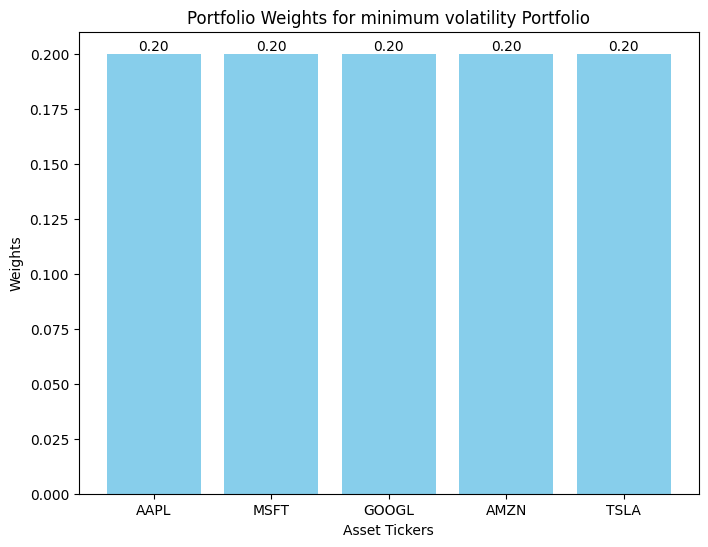

In [15]:
plot_weights(equal_weights, 'Portfolio Weights for minimum volatility Portfolio')